# Лабораторная работа 3
# Анимация движения секущей прямой к заданной линии на плоскости

#### Присяжнюк Александра, 14.03 

# Задание 3.1. Анимированное построение линии на плоскости

## Реализация Задания 3.1a

In [173]:
import ipympl
import sympy

In [175]:
import ipywidgets

In [177]:
import numpy as np

In [179]:
import matplotlib.pyplot as plt

Для построения анимации будем использовать функцию `FuncAnimation` из модуля `animation` пакета `matplotlib`

In [182]:
from matplotlib.animation import FuncAnimation

In [184]:
%matplotlib widget

Будем строить анимацию для функции вида $y(x) = \sin(x)^4$ по значениям $x$, изменяющимся от $x_{min} = 1$ до $x_{max} = 5$ с шагом $step = 0.05$.

**Определение функции**  
Определим функцию $y(x)$ с применением оператора `def`:

In [188]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return np.sin(x)**4

**Создание переменных**  
Определим границы изменения $x$ и шаг:

In [191]:
x_min = 1.; x_max = 5.; step = 0.05

**Создание массивов**
Создадим массив `x_array`, содержащий равномерно распределенные числа на отрезке $[x_{min}, x_{max}]$ с шагом `step`, с помощью функции `arange`. Затем создадим массив `y_array`, содержащий соответствующие значения $y$, используя определённую ранее функцию `y`:

In [194]:
x_array = np.arange(x_min, x_max, step)
y_array = y(x_array)

**Формирование матрицы координат**  
Из двух массивов `x_array` и `y_array` создадим матрицу `matrix`, содержащую координаты точек графика функции $y(x)$. Матрица будет состоять из двух столбцов: первый содержит $x$-координаты, второй — $y$-координаты:

In [197]:
matrix = np.transpose([x_array, y_array])

**Создание графического окна**  
С помощью функции `figure` из модуля `pyplot` создадим графическое окно `fig1`, в котором в дальнейшем будет отображаться анимация:

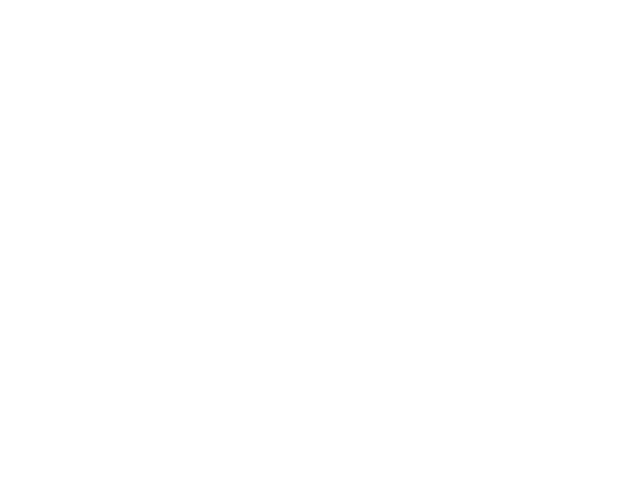

In [200]:
fig1 = plt.figure()

C помощью функции `axes` из модуля `pyplot` cоздадим графическую область `ax1` и зададим для нее пределы по осям

In [203]:
y_min, y_max = np.min(y_array), np.max(y_array)
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])


(0.5, 5.5, -0.499999995004082, 1.4996930655910048)

С помощью функции `plot` из пакета `pyplot` создадим в графической области
`ax1` графический объект типа `Line2D` синего цвета, координаты которого пока не определены

In [206]:
line1, = ax1.plot([],[],'b')
print(type(line1))
line1.get_xdata(), line1.get_ydata()

<class 'matplotlib.lines.Line2D'>


(array([], dtype=float64), array([], dtype=float64))

In [208]:
?line1.get_xdata

Signature: line1.get_xdata(orig=True)
Docstring:
Return the xdata.

If *orig* is *True*, return the original data, else the
processed data.
File:      c:\users\user\anaconda3\lib\site-packages\matplotlib\lines.py
Type:      method

Определим пользовательскую функцию одного аргумента `at_frame1` , которая будет вызываться в каждом кадре анимации. </br>
Единственный аргумент функции `at_frame1` является массивом из и координат точки графика функции. Функция `at_frame1` добавляет к графическому объекту `line1` точку с координатами $(x,y)$

In [211]:
def at_frame1(point):
 """добавляет к объекту line1 точку с координатами (point[0],point[1])

 Arguments :

 point : массив из двух элементов

 Returns : None
 """
 x_coord = list(line1.get_xdata())
 y_coord = list(line1.get_ydata())

 x_coord.append(point[0])
 y_coord.append(point[1])

 line1.set_data(x_coord, y_coord) 

In [213]:
?line1.set_data

Signature: line1.set_data(*args)
Docstring:
Set the x and y data.

Parameters
----------
*args : (2, N) array or two 1D arrays

See Also
--------
set_xdata
set_ydata
File:      c:\users\user\anaconda3\lib\site-packages\matplotlib\lines.py
Type:      method

In [215]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(point)
    добавляет к объекту line1 точку с координатами (point[0],point[1])

    Arguments :

    point : массив из двух элементов

    Returns : None



In [217]:
?at_frame1

Signature: at_frame1(point)
Docstring:
добавляет к объекту line1 точку с координатами (point[0],point[1])

Arguments :

point : массив из двух элементов

Returns : None
File:      c:\users\user\appdata\local\temp\ipykernel_22272\1118907211.py
Type:      function

In [219]:
print(at_frame1.__doc__)

добавляет к объекту line1 точку с координатами (point[0],point[1])

 Arguments :

 point : массив из двух элементов

 Returns : None
 


In [221]:
?FuncAnimation

Init signature:
FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
`TimedAnimation` subclass that makes an animation by repeatedly calling
a function *func*.

.. note::

    You must store the created Animation in a variable that lives as long
    as the animation should run. Otherwise, the Animation object will be
    garbage-collected and the animation stops.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied using `functools.partial` or via the *fargs*
    parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    It is often more convenient to provide the arguments u

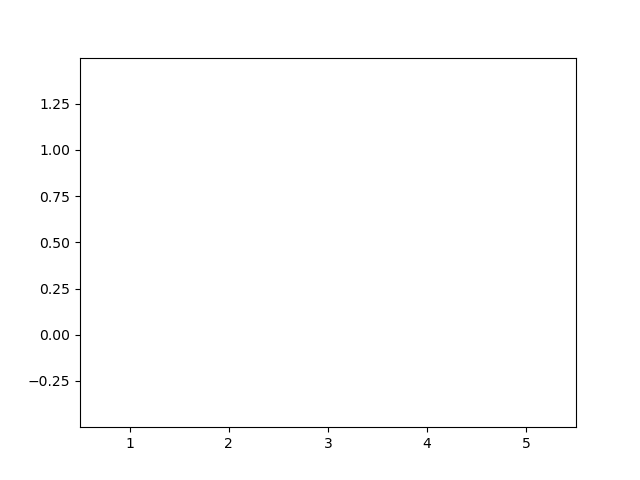

In [223]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
line1, = ax1.plot([], [],'b')
FuncAnimation(fig1, at_frame1, frames=matrix, repeat=False, interval=15)

## Реализация Задания 3.1b

In [226]:
t_max = 3.0 # конец
t_min= 0.5 # начало
step=(t_max-t_min)/100

In [228]:
t_array = np.arange(t_min,t_max,step) 
x = np.arctan(np.exp(t_array/2))
y = np.sqrt(np.exp(t_array) + 1)

In [230]:
matrix1 = np.transpose([x, y])

In [232]:
y_mn, y_mx = np.min(y), np.max(y)
x_mn, x_mx = np.min(x), np.max(x)
ax11 = plt.axes()
plt.axis([x_mn-0.5, x_mx+0.5, y_mn-0.5, y_mx+0.5])

(0.409116062888664, 1.8485904113678955, 1.1274892536358352, 5.037579007532105)

In [234]:
line11, = ax11.plot([],[],'r')

In [236]:
def at_frame11(point):
 x_coord = list(line11.get_xdata())
 y_coord = list(line11.get_ydata())

 x_coord.append(point[0])
 y_coord.append(point[1])

 line11.set_data(x_coord, y_coord)

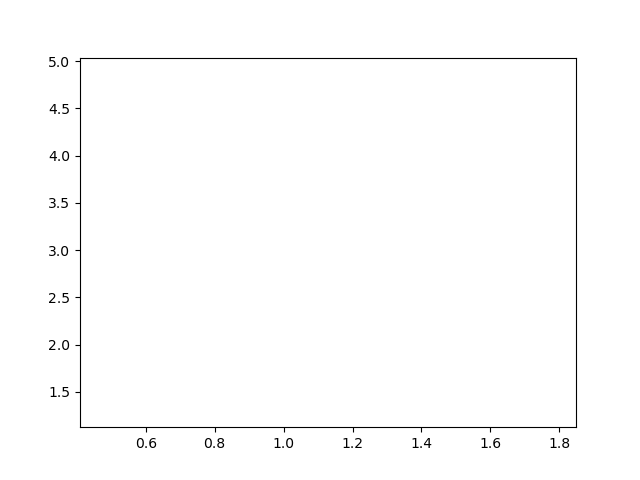

In [269]:
fig11 = plt.figure()
ax11 = plt.axes()
plt.axis([x_mn-0.5, x_mx+0.5, y_mn-0.5, y_mx+0.5])
line11, = ax11.plot([],[],'r')
FuncAnimation(fig11, at_frame11, frames=matrix1, repeat=False, interval=30)

# Задание 3.2. Движение точки по линии на плоскости

Последовательно выполним следущие действия с использованием функций из модуля `pyplot` :
- с помощью функции `figure` создадим графическое окно, в котором в дальнейшем будет отображаться анимация;
- с помощью функции `axes` cоздадим графическую область и зададим для нее
пределы по осям с помощью функции `axis` ;
- с помощью функции plot создадим в графической области графический объект типа `Line2D` синего цвета `'b'` , координаты которого описывают аналитическую функцию;
- с помощью функции `plot` создадим в графической области графический объект типа `Line2D` зеленого цвета с маркером в виде кружка `'go'` , координаты которого пока неизвестны

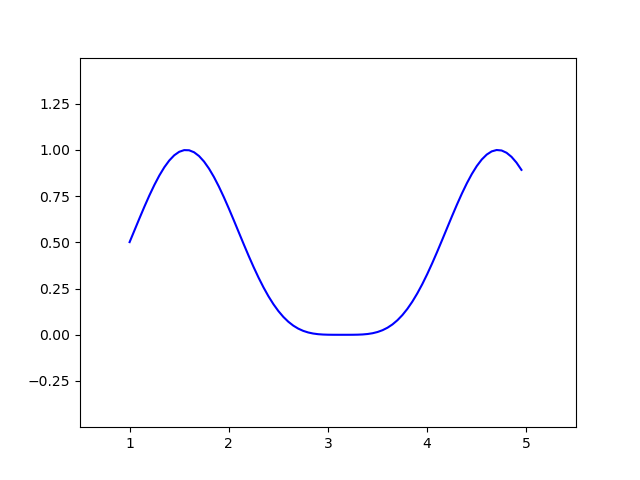

In [242]:
fig2 = plt.figure()

ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])

line1, = ax2.plot(x_array, y_array,'b') # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки

Определим пользовательскую функцию одного аргумента `at_frame2` , которая будет вызываться в каждом кадре анимации. Единственный аргумент функции `at_frame2` является массивом из и координат точки графика функции. Функция `at_frame2` задает графический объект `line2` единственной точкой с координатами

In [245]:
def at_frame2(point):
    """Задает объект line2 точкой с координатами (point[0], point[1])
    
    Arguments:
    point : массив из двух элементов

    Returns: None
    """
    line2.set_data([point[0]], [point[1]]) 


Полагаем аргумент `init_func` функции `FunAnimation` равным пользовательской функции `init : init_func=init` . Функция `init` будет вызываться перед началом анимации. Назначение функции `init :` отображение графика функции, создание графика для отображения точки и создание легенды для двух графиков.


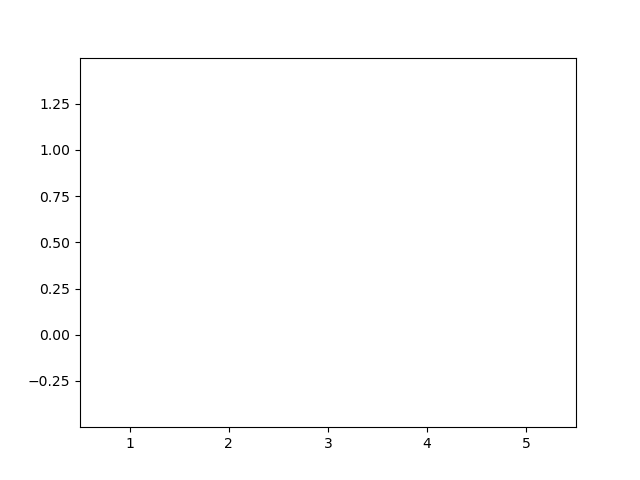

In [248]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5])
def init():
    """Создает начальное состояние графической области"""
    global line2  # Переменная сделана глобальной, чтобы она могла изменяться внутри функции
    
    line1, = ax2.plot(x_array, y_array, 'b')
    line2, = ax2.plot([], [], 'go')
    plt.legend([r'$y(x) = \sin(x)^4$', 'Movable point'])
    
FuncAnimation(fig2, at_frame2, frames=matrix, init_func=init,repeat=False, interval=20)



## Реализация анимации для функции из 3.1b

(0.409116062888664, 1.8485904113678955, 1.1274892536358352, 5.037579007532105)

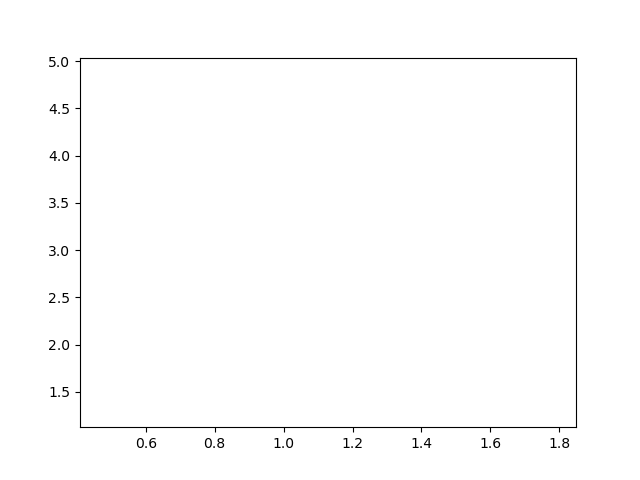

In [251]:
fig22 = plt.figure()
ax22 = plt.axes()
plt.axis([x_mn-0.5, x_mx+0.5, y_mn-0.5, y_mx+0.5])

In [253]:
line11, = ax22.plot(x, y,'r') # объект для графика функции
line22, = ax22.plot([], [],'go') # объект для точки

In [255]:
def at_frame22(point):
    """Задает объект line22 точкой с координатами (point[0], point[1])
    
    Arguments:
    point : массив из двух элементов

    Returns: None
    """
    line22.set_data([point[0]], [point[1]]) 

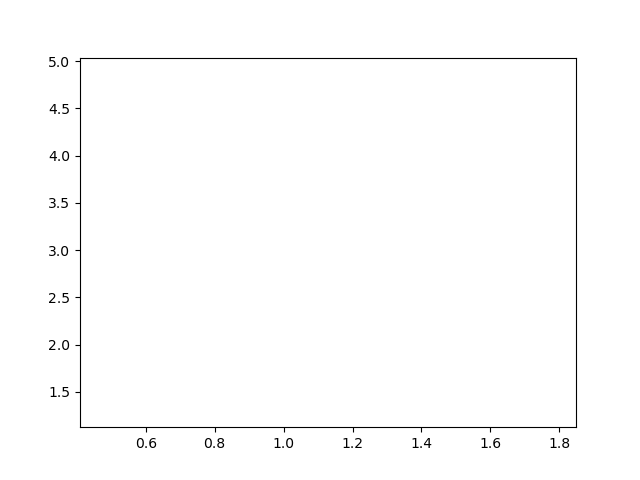

In [267]:
fig22 = plt.figure()
ax22 = plt.axes()
plt.axis([x_mn-0.5, x_mx+0.5, y_mn-0.5, y_mx+0.5])
def init1():
    """Создает начальное состояние графической области"""
    global line22  # Переменная сделана глобальной, чтобы она могла изменяться внутри функции
    
    line11, = ax22.plot(x, y,'r')
    line22, = ax22.plot([], [], 'go')
    plt.legend([r'$x = \arctan e^{t/2}, \quad y = \sqrt{e^t + 1}$', 'Movable point'])
    
FuncAnimation(fig22, at_frame22, frames=matrix1, init_func=init1,repeat=False, interval=20)

# Задание 3.3. Движение секущей прямой к заданной линии на плоскости (версия 1)

Перед началом анимации графическая область должна содержать следующие графические объекты: 

- график заданной функции, которая определяет траекторию движения подвижной точки B ;
- неподвижную точку A ;
- начальное положение подвижной точки B ;
- cекущую прямую, проходящую через точки A и B .</br>
Начальное состояние графической области реализуем с помощью пользовательской функции `init` .


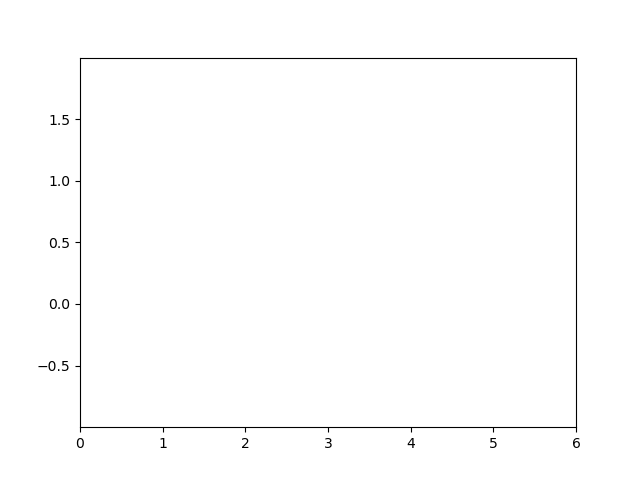

In [265]:
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min-1, x_max+1, y_min-1, y_max+1])
def init():
    """
    Создает начальное состояние графической области перед началом анимации.
    
    Returns: None
    """
    global point_B, secant_line # переменные сделаны глобальными, чтобы они были

    curve, = ax3.plot(x_array, y_array,'b') # графический объект для исходной фу

    A = np.array([x_array[0], y_array[0]])
    point_A, = ax3.plot(A[0],A[1],'ro') # графический объект для неподвижной точ

    B = np.array([x_array[-1], y_array[-1]])
    point_B, = ax3.plot(B[0],B[1],'go') # графический объект для подвижной точки

    secant_p = [A + (B - A)*t for t in [-2, 2]] # две точки секущей прямой, прох
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1],'g') # графический объе

    plt.legend([r'$y(x) = \sin(x)^4$','Unmovable point A','Мovable point B','Secant line'])
def at_frame3(point):
    """
    Do: обновляет положение подвижной точки B и секущей прямой на каждом кадре анимации.

    Arguments :

    point : массив из двух элементов, задающий координаты подвижной точки B.

    Returns : None
    """
    global point_B, secant_line
    A = np.array([x_array[0], y_array[0]])
    B = np.array([point[0],point[1]])
    point_B.set_data([point[0]],[point[1]])
    if B[0]==A[0]:
        t = sympy.Symbol('t')
        y_x=sympy.sin(t)**4
        y_difx = sympy.diff(y_x, t) 
        k=y_difx.subs(t, A[0])
        y_kasstart = np.array([A[0],A[1]])
        y_kasend = np.array([A[0]+1,k+A[1]])
        y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-8, 8]]
        y_kas = np.array(y_kas)
        secant_line.set_data(y_kas[:,0], y_kas[:,1])
        secant_line.set_color('r')
    else:
        secant_p = [A + (B - A)*l for l in [-2, 2]] # две точки секущей прямой, прох
        secant_p = np.array(secant_p)
        secant_line.set_data(secant_p[:,0], secant_p[:,1])
FuncAnimation(fig3, at_frame3, frames=matrix[::-1], init_func=init, repeat=False, interval=20)

## Задание 3.4. Движение секущей прямой к заданной линии на плоскости (версия 2)

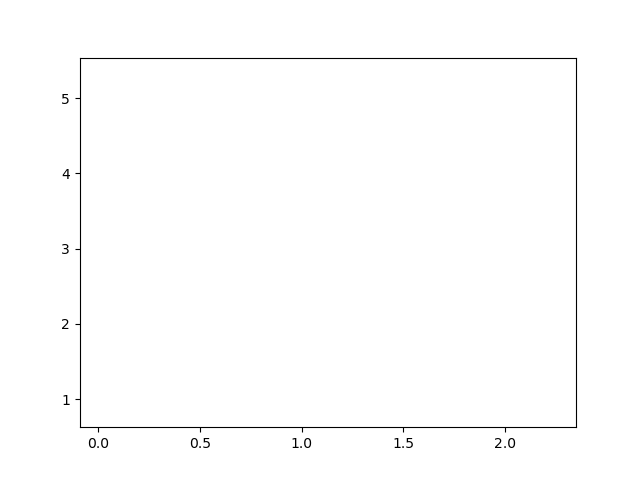

In [263]:
fig33 = plt.figure()
ax33 = plt.axes()
plt.axis([x_mn-1, x_mx+1, y_mn-1, y_mx+1])
def init3():
    """
    Создает начальное состояние графической области перед началом анимации.
    
    Returns: None
    """
    global point_B3, secant_line3 # переменные сделаны глобальными, чтобы они были

    curve, = ax33.plot(x, y,'b') # графический объект для исходной фу

    A3 = np.array([x[0], y[0]])
    point_A3, = ax33.plot(A3[0],A3[1],'ro') # графический объект для неподвижной точ

    B3 = np.array([x[-1], y[-1]])
    point_B3, = ax33.plot(B3[0],B3[1],'go') # графический объект для подвижной точки

    secant_p3 = [A3 + (B3 - A3)*t for t in [-2, 2]] # две точки секущей прямой, прох
    secant_p3 = np.array(secant_p3)
    secant_line3, = ax33.plot(secant_p3[:,0], secant_p3[:,1],'g') # графический объе

    plt.legend([r'$x = \arctan e^{t/2}, \quad y = \sqrt{e^t + 1}$','Мovable point B','Secant Line'])
def at_frame33(point):
    """
    Do: обновляет положение подвижной точки B и секущей прямой на каждом кадре анимации.

    Arguments :

    point : массив из двух элементов, задающий координаты подвижной точки B.

    Returns : None
    """
    global point_B3, secant_line3
    A3 = np.array([x[0], y[0]])
    B3 = np.array([point[0],point[1]])
    point_B3.set_data([point[0]],[point[1]])
    if B3[0]==A3[0]:
        t = sympy.Symbol('t')
        x_d=sympy.atan(sympy.exp(t/2))
        y_d = sympy.sqrt(sympy.exp(t) + 1)
        x_difx = sympy.diff(x_d, t)
        y_difx = sympy.diff(y_d, t) 
        k=y_difx.subs(t, t_array[0])/x_difx.subs(t, t_array[0])
        y_kasstart = np.array([A3[0],A3[1]])
        y_kasend = np.array([A3[0]+1,k+A3[1]])
        y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-1, 2]]
        y_kas = np.array(y_kas)
        secant_line3.set_data(y_kas[:,0], y_kas[:,1])
        secant_line3.set_color('r')
    else:
        secant_p3 = [A3 + (B3 - A3)*l for l in [-2, 2]] # две точки секущей прямой, прох
        secant_p3 = np.array(secant_p3)
        secant_line3.set_data(secant_p3[:,0], secant_p3[:,1])
FuncAnimation(fig33, at_frame33, frames=matrix1[::-1], init_func=init3, repeat=False, interval=20)

In [277]:
x=2

In [285]:
(lambda: x**2) (x=3) 

TypeError: <lambda>() got an unexpected keyword argument 'x'